#  Singlet Scalar Dark Matter

We expect here degenerate masses so we must be carefull about the DM particles that is registered by micrOMEGAS:

We need to edit prtcls1.mld to have the righ order with Nv0 appearing first

In [247]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [248]:
import pandas as pd #Series and DataFrames
import numpy as np #arrays
import os, sys
import commands
from hep import * 
import time

## Feynrules implementation
[Preliminary Analysis](../../../2016/micromegas_feynrules/correr_micrOMEGAs-markov.ipynb)

See also full results with user galcen in fisica? or gfif?


## Check one point

In [ ]:
a=hep(MODEL='SSDM')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [27]:
a.LHA.blocks['MINPAR'].entries

_dict([(1, '2.8000000E-01  # Lambda1IN'),
       (2, '1.0000000E-02  # LamSHIN'),
       (3, '0.0000000E+00  # LamSIN'),
       (4, '2.0000000E+02  # MSinput')])

Run one point

### Fix Higgs mass  ¿listo?

In [28]:
v=a.vev
a.LHA.blocks['MINPAR'][2]='%0.8E       # LamhS' %60
a.LHA.blocks['MINPAR'][1]='%0.8E       # LamIn' %0.26
a.LHA.blocks['MINPAR'][4]='%0.8E       # muS2' %60
moc=a.runmicromegas(Direct_Detection=True)
ap=a.branchings(a.LHA_out.decays,min_pdg=25) #Fill a.Br_names
a.Series['Mh']=a.LHA_out.blocks['MASS'][25]
a.Series['MS']=a.LHA_out.blocks['MASS'][6666635]
a.Series=a.Series.append(a.Br_names)
a.Series

GFFermiconstant            1.166370e-05
LamIn                      2.600000e-01
LamSIN                     0.000000e+00
LamhS                      6.000000e+01
Zbosonpolemass             9.118870e+01
alphasMZSMMSbar            1.187000e-01
mbmbSMMSbar                4.180000e+00
mtaupole                   1.776690e+00
mtoppole                   1.735000e+02
muS2                       6.000000e+01
Omega_h2                   4.050000e-06
proton_SI                  1.729000e-05
proton_SD                  0.000000e+00
neutron_SI                 1.784000e-05
neutron_SD                 0.000000e+00
O_chnl:~Ss ~Ss -> Wp Wm    5.024400e-01
O_chnl:~Ss ~Ss -> Z Z      2.508310e-01
O_chnl:~Ss ~Ss -> h h      2.421950e-01
Mh                         1.255483e+02
MS                         1.907232e+03
h0 ->  SBAR S              2.112388e-04
h0 ->  DBAR D              5.872784e-07
h0 ->  W- W+               2.265950e-01
h0 ->  GLUE GLUE           8.724444e-02
h0 ->  PHOT PHOT           2.682623e-03


## Scan $\lambda - m_{DM}$
Fig 1. of http://arxiv.org/pdf/1306.4710.pdf

Check also Fig. 1 of https://arxiv.org/pdf/1411.1335v2.pdf

In [29]:
print a.Series.Omega_h2,a.Series['Omega_h2'],a.Series['h0 ->  Z0 Z0'],a.Series.neutron_SI, v

4.05e-06 4.05e-06 0.0248403636 1.784e-05 246.220569073


In [30]:
start=time.time()
df=pd.DataFrame() #initialize empty dataframe
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
npoints=100
dm_masses=np.linspace(40,120,npoints)
LamSmin=1E-4;LamSmax=10**(-1.25)
lambdas=np.logspace(np.log10(LamSmin),np.log10(LamSmax),npoints)
for MS in dm_masses:
    if np.where(dm_masses==MS)[0][0]%10==0: #find the index of the array entry
            print np.where(dm_masses==MS)[0][0]
    #muS2=int_to_phys(LamS,MS)
    #loop in LamS
     
    for LamhS in lambdas:
        #print muS2,LamS
        muS2= MS**2-LamhS*v**2 

        a.LHA.blocks['MINPAR'][1]='%0.8E       # LamIn' %0.26
        a.LHA.blocks['MINPAR'][2]='%0.8E       # LamhS' %LamhS
        a.LHA.blocks['MINPAR'][4]='%0.8E       # muS2' %muS2
        #muS2= MS**2-0.5**2*LamhS*v**2  
        a.runmicromegas(Direct_Detection=True)
        pa=a.branchings(a.LHA_out.decays,min_pdg=25) #Fill a.Br_names
        a.Series=a.Series.append(a.Br_names)
        a.Series['Mh']=a.LHA_out.blocks['MASS'][25]
        a.Series['MS']=a.LHA_out.blocks['MASS'][6666635]
        df=df.append(a.Series,ignore_index=True)
        df=df.fillna(0)
    
print time.time()-start

0
10
20
30
40
50
60
70
80
90
12778.6912861


In [31]:
df[:1]

,GFFermiconstant,LamIn,LamSIN,LamhS,MS,Mh,O_chnl:~Ss ~Ss -> Wp Wm,O_chnl:~Ss ~Ss -> Z Z,O_chnl:~Ss ~Ss -> d3 D3,O_chnl:~Ss ~Ss -> e3 E3,...,h0 -> ss ss,mbmbSMMSbar,mtaupole,mtoppole,muS2,neutron_SD,neutron_SI,proton_SD,proton_SI,O_chnl:~Ss ~Ss -> h h
0,0.000012,0.26,0,0.0001,40,125.548349,0.186759,0.022538,0.638511,0.063454,...,0.000038,4.18,1.77669,173.5,1593.93754,0,1.491000e-13,0,1.454000e-13,0


### Relic density

In [32]:
df.shape

(10000, 37)

In [33]:
#df.to_csv('datos_0666.csv',index=False)

In [3]:
ls -lh *.csv

-rw-r--r-- 1 valentina valentina 1.3M Aug 16 13:53 datos_01.csv
-rw-r--r-- 1 valentina valentina 1.3M Aug 16 13:28 datos.csv


In [252]:
df=pd.read_csv('datos_0666.csv')
df=df.append(pd.read_csv('datos_01.csv'))
df.shape

(13600, 37)

#### Filter bad points:

In [264]:
df=df[df.Omega_h2>0]
df=df.sort_values('MS')
df.shape

(13552, 37)

In [266]:
df.to_csv('results.csv',index=False)

Masscaras
nuevodf=viejodf[condicion]
* condicion direct >,<,>=,<=,==
 
 viejodf['key'] or viejodf.key
 
 viejodf[viejodf['h0 -> ss ss']>0.19]
* condiciones logicas:
 
 np.logical.and(df.Omega_h2>0.11,df.Omega_h2<0.12)

In [267]:
Omega_h2_EXP=np.array([0.1197-2*0.0044,0.1197,0.1197+2*0.0044])
dr=df[df.Omega_h2<Omega_h2_EXP[2]]
dre=df[np.logical_and(df.Omega_h2>Omega_h2_EXP[0],df.Omega_h2<Omega_h2_EXP[2])]
dg=df[df['h0 ->  ss ss']>0.19]

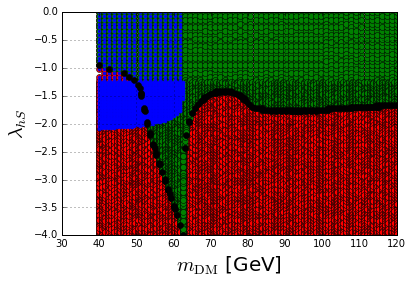

In [268]:
plt.plot(df.MS,np.log10(df.LamhS),'ro')
plt.plot(dr.MS,np.log10(dr.LamhS),'go')
plt.plot(dg.MS,np.log10(dg.LamhS), 'b.')
plt.plot(dre.MS,np.log10(dre.LamhS), 'ko')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\lambda_{hS}$',size=20)
plt.grid()
#plt.ylim(-4,0.7)
#plt.xlim(45,70)
plt.savefig('fig1.pdf')

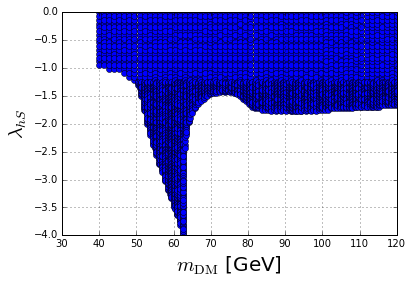

In [269]:
plt.plot(dr.MS,np.log10(dr.LamhS),'bo')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\lambda_{hS}$',size=20)
plt.grid()

In [270]:
chk=dr[np.logical_and(dr.Omega_h2<0.12,dr.MS<42)]
chk=chk[chk.LamhS==chk.LamhS.min()]

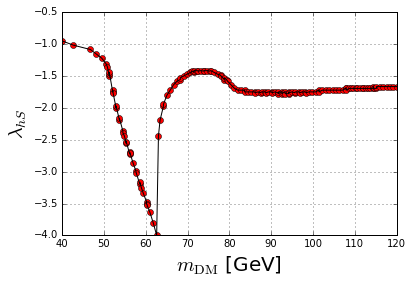

In [273]:
dli=df[df.Omega_h2==0.12]
plt.plot(dre.MS,np.log10(dre.LamhS),'ro')
plt.plot(dre.MS,np.log10(dre.LamhS),'k-')
#plt.plot(dli.MS,np.log10(dli.LamhS), 'ro')
#plt.plot(chk.MS,np.log10(chk.LamhS),'bo')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\lambda_{hS}$',size=20)
plt.grid()

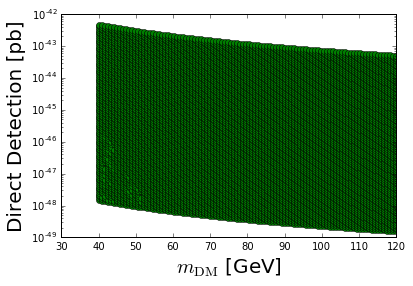

In [26]:
dpt=df[df.neutron_SI<0.5]
dni=df[np.logical_and(df.neutron_SI>0.00001,df.neutron_SI<0.12)]
#plt.plot(df.MS,df.neutron_SI,'ko')
plt.semilogy(dni.MS,dni.LamhS,'ko')
#plt.semilogy(dpt.MS,dpt.neutron_SI,'bo')
plt.semilogy(df.MS,df.neutron_SI*10E-36, 'go')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)



### k = np.log10(df.LamhS)
plt.plot(df.MS,k)
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=30)
plt.ylabel(r'$\lambda_{hS}$',size=30)
plt.grid()

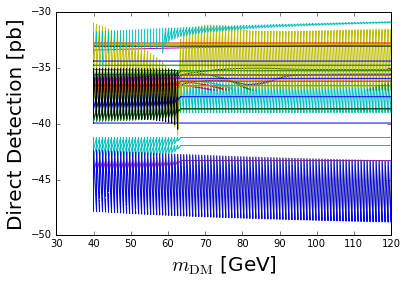

In [24]:
dis=df[df.neutron_SI<0.12]
plt.plot(dis.MS,np.log10(dis*10E-36))
#plt.semilogy(dis.MS,dis.LamhS, 'k-')
#plt.semilogy(df.MS,df.neutron_SI)
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)

[![Home](http://www.incredimail.com/images/nav%20bar/home-icon.png)](./) 
[Jupyter home](./draft.pdf)

Lux 2016: https://github.com/restrepo/straightfits/blob/master/multicurvefit.ipynb

In [280]:
from multicurvefit import *
lux=multicurvefit()
lux.read_json('lux2016.json')

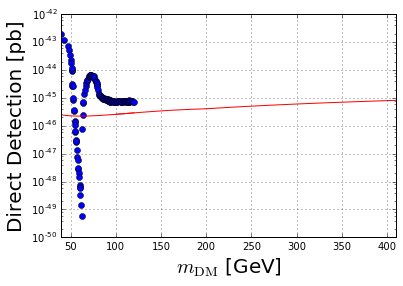

In [291]:
#du=df.neutron_SI*((df.Omega_h2))*10E-36
#df['h0 ->  ss ss']*df['h0 ->  smas ss']
#dsig=df[du<0.13]
fx=np.logspace(np.log10(100),np.log10(1000))
plt.semilogy(dre.MS,dre.neutron_SI*1E-36,'bo')
plt.semilogy(dre.MS,lux(dre.MS)*1E-36,'r-')
plt.semilogy(fx,lux(fx)*1E-36,'r-')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)
plt.xlim(40,410)
plt.grid()

In [ ]:
du=dre.neutron_SI*((df.Omega_h2))*10E-36
#df['h0 ->  ss ss']*df['h0 ->  ss ss']
#dsig=df[du<0.13]
plt.semilogy(df.MS,du,'bo')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)

In [8]:
print df.neutron_SI*df['h0 ->  ss ss']*df['h0 ->  ss ss']

0       2.100325e-22
1       3.081974e-22
2       4.523268e-22
3       6.640095e-22
4       9.743897e-22
5       1.430564e-21
6       2.099318e-21
7       3.081998e-21
8       4.523540e-21
9       6.639387e-21
10      9.744445e-21
11      1.430228e-20
12      2.099263e-20
13      3.081075e-20
14      4.522148e-20
15      6.640179e-20
16      9.740308e-20
17      1.430136e-19
18      2.098907e-19
19      3.079609e-19
20      4.519324e-19
21      6.633516e-19
22      9.732926e-19
23      1.428734e-18
24      2.096266e-18
25      3.076906e-18
26      4.515049e-18
27      6.625227e-18
28      9.720831e-18
29      1.426290e-17
            ...     
9970    0.000000e+00
9971    0.000000e+00
9972    0.000000e+00
9973    0.000000e+00
9974    0.000000e+00
9975    0.000000e+00
9976    0.000000e+00
9977    0.000000e+00
9978    0.000000e+00
9979    0.000000e+00
9980    0.000000e+00
9981    0.000000e+00
9982    0.000000e+00
9983    0.000000e+00
9984    0.000000e+00
9985    0.000000e+00
9986    0.000

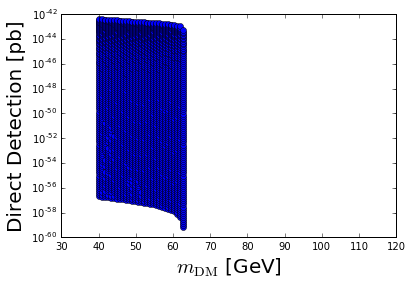

In [23]:
du=df.neutron_SI*(df['h0 ->  ss ss']**2)*10E-36
#dsig=df[du<0.13]
plt.semilogy(df.MS,du,'bo')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)